In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

In [60]:
import nltk
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
import demoji

In [85]:
data = pd.read_json("comments_f1.json")

In [67]:
data.head()

,_id,name,appreciation,comments
0,{'$oid': '647bab3240fabfafb506263d'},Dahl de lentilles corail,4.5/5,[Recette de base que j'adapte en fonction des ...
1,{'$oid': '647bab3240fabfafb506263e'},Poêlée de panais,4.4/5,[Délicieux. C'est la première fois que je cuis...
2,{'$oid': '647bab3240fabfafb506263f'},Aubergines au four,4.3/5,[Facile à préparer et très sain. Il faut mettr...
3,{'$oid': '647bab3240fabfafb5062640'},Curry de pois chiches,4.8/5,"[après 10' j'ajoute des épinards., Rien à ajou..."
4,{'$oid': '647bab3240fabfafb5062641'},Galettes de pomme de terre,3.9/5,[Très bien. Je n'ai mis qu'un oignon que j'ai ...


In [68]:
data.shape

(365, 4)

In [69]:
# Supprimer la colonne '_id' si elle n'est pas nécessaire pour la visualisation
data.drop('_id', axis=1, inplace=True)

# Afficher les premières lignes du DataFrame pour s'assurer que les données ont été chargées correctement
data.head()

,name,appreciation,comments
0,Dahl de lentilles corail,4.5/5,[Recette de base que j'adapte en fonction des ...
1,Poêlée de panais,4.4/5,[Délicieux. C'est la première fois que je cuis...
2,Aubergines au four,4.3/5,[Facile à préparer et très sain. Il faut mettr...
3,Curry de pois chiches,4.8/5,"[après 10' j'ajoute des épinards., Rien à ajou..."
4,Galettes de pomme de terre,3.9/5,[Très bien. Je n'ai mis qu'un oignon que j'ai ...


In [70]:
# Traitement des données
# Supprimer les caractères spéciaux et convertir la colonne 'appreciation' en numérique
data['appreciation'] = data['appreciation'].str.replace('/5', '').astype(float)

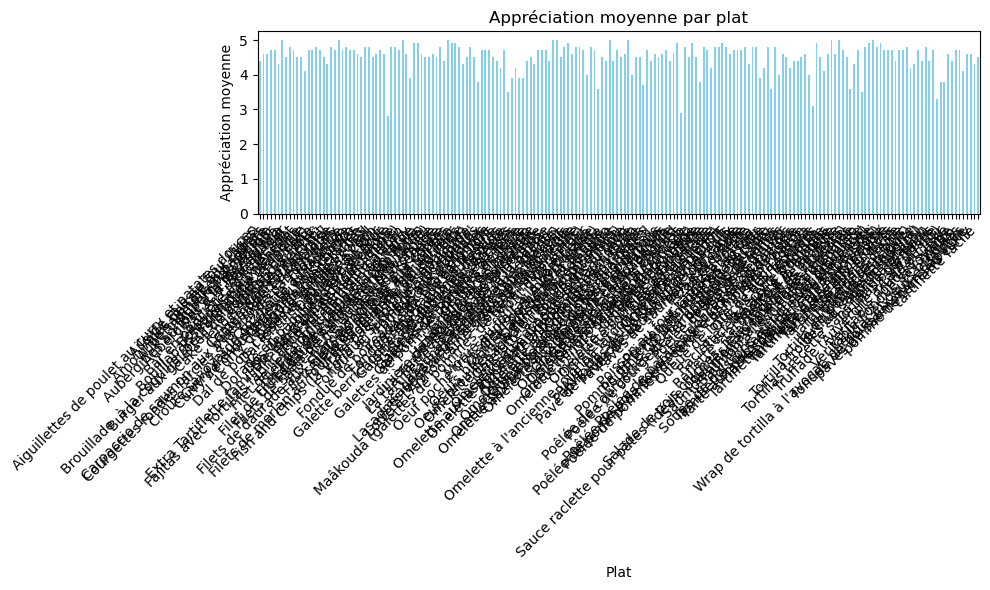

In [71]:
# Diagramme à barres de l'appréciation moyenne par nom
plt.figure(figsize=(10, 6))
data.groupby('name')['appreciation'].mean().plot(kind='bar', color='skyblue')
plt.title('Appréciation moyenne par plat')
plt.xlabel('Plat')
plt.ylabel('Appréciation moyenne')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [72]:
data['appreciation'].unique()

array([4.5, 4.4, 4.3, 4.8, 3.9, 4.7, 4.6, 5. , 4. , 4.1, 4.9, 4.2, 3.5,
       2.8, 3.6, 3.8, 2.9, 3.7, 3.1, 3.3])

In [73]:
# Convertir la colonne "appreciation" en chaîne de caractères
data['appreciation'] = data['appreciation'].astype(str)

# Extraire la partie numérique de la colonne 'appreciation' et la convertir en nombre à virgule flottante
data['appreciation'] = data['appreciation'].str.extract('(\d+\.\d+)').astype(float)

# Compter le nombre de chaque note
note_counts = data['appreciation'].value_counts()

# Calculer le pourcentage de chaque note
note_percentages = (note_counts / note_counts.sum()) * 100

In [74]:
# Compter le nombre de chaque note
note_counts = data['appreciation'].value_counts()

# Calculer le pourcentage de chaque note
note_percentages = (note_counts / note_counts.sum()) * 100

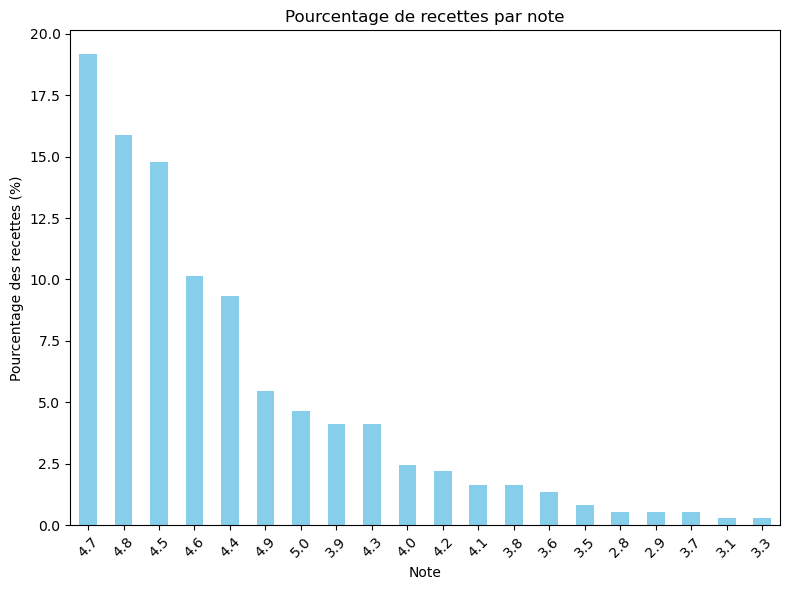

In [75]:
# Visualisation
plt.figure(figsize=(8, 6))
note_percentages.plot(kind='bar', color='skyblue')
plt.title('Pourcentage de recettes par note')
plt.xlabel('Note')
plt.ylabel('Pourcentage des recettes (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

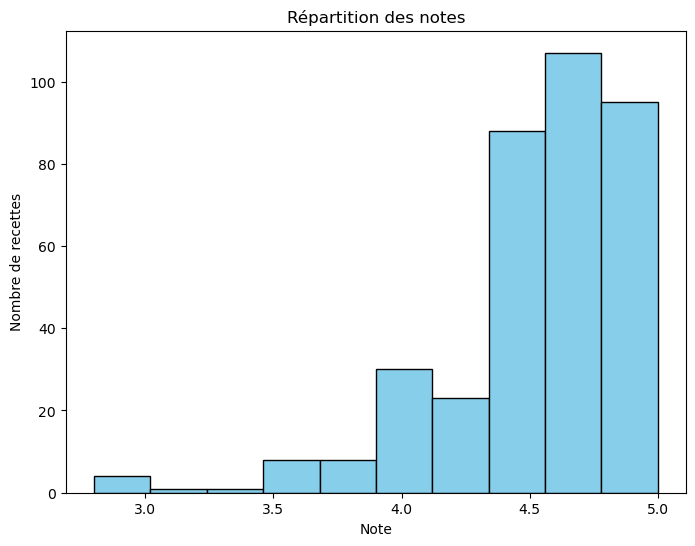

In [76]:
plt.figure(figsize=(8, 6))
plt.hist(data['appreciation'], bins=10, color='skyblue', edgecolor='black')
plt.title('Répartition des notes')
plt.xlabel('Note')
plt.ylabel('Nombre de recettes')
plt.show()


### Boîte à moustaches (Boxplot)

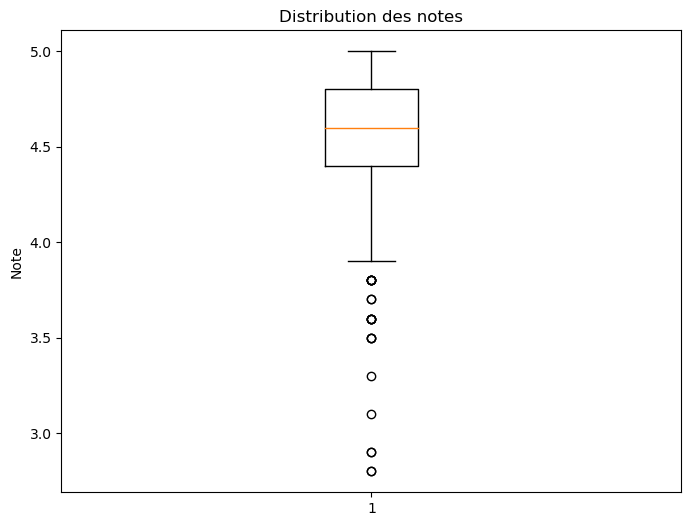

In [77]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['appreciation'])
plt.title('Distribution des notes')
plt.ylabel('Note')
plt.show()

### Statistiques descriptives 

In [78]:
print(data['appreciation'].describe())

count    365.000000
mean       4.512055
std        0.376606
min        2.800000
25%        4.400000
50%        4.600000
75%        4.800000
max        5.000000
Name: appreciation, dtype: float64


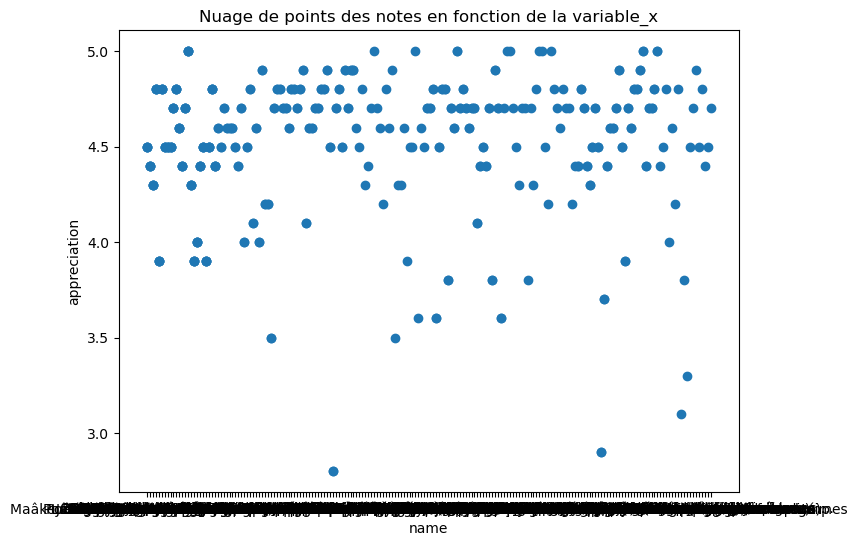

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(data['name'], data['appreciation'])
plt.title('Nuage de points des notes en fonction de la variable_x')
plt.xlabel('name')
plt.ylabel('appreciation')
plt.show()


In [80]:
# Select only numerical columns
numerical_df = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Print correlation matrix
print(correlation_matrix)


              appreciation
appreciation           1.0


In [81]:
# Créer une fonction pour vérifier si une chaîne contient des emojis
def contains_emojis(text):
    # Expression régulière pour correspondre à des séquences d'emojis
    emoji_pattern = re.compile("[\U0001F300-\U0001F5FF]|[\U0001F600-\U0001F64F]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]|[\U0001f926-\U0001f937]|[\U0001F1E0-\U0001F1FF]+")

    # Retourne True si la chaîne contient des emojis, sinon False
    return bool(re.search(emoji_pattern, text))

# Filtrer les commentaires qui contiennent des emojis
emoji_comments = data[data['comments'].apply(lambda x: any(contains_emojis(comment) for comment in x))]

# Afficher les commentaires qui contiennent des emojis
print(emoji_comments)

                                                  name  appreciation  \
0                             Dahl de lentilles corail           4.5   
2                                   Aubergines au four           4.3   
3                                Curry de pois chiches           4.8   
4                           Galettes de pomme de terre           3.9   
5                      Lasagnes végétariennes (facile)           4.8   
..                                                 ...           ...   
330               Omelette aux girolles, ail et persil           4.6   
333  Omelette à l'ancienne (oignon-lardon-pomme de ...           4.9   
336                        Tortilla de pommes de terre           4.7   
348                      Omelette espagnole au chorizo           4.5   
354                                    Pâte à tortilla           3.1   

                                              comments  
0    [Recette de base que j'adapte en fonction des ...  
2    [Facile à prépar

In [33]:
# Imprimer le commentaire de la première ligne de données
print(data.iloc[0]['comments'])

["Recette de base que j'adapte en fonction des légumes de ma maison. C'est très sympa avec de la patate douce 😀🌞⛵🌊", 'N’oubliez pas de faire cuire en avance les carottes !! Sinon recette très bonne avec beaucoup de saveur', "D'accord pour le commentaire sur les carottes . Je n'ai pas trouvé ça ressemblant au Dahl Corail que j'avais l'habitude de manger dans les restaurants indiens. Décevant !", "Très bonne recette réalisée avec des lentilles vertes et davantage de lait de coco. J'ai ajouté des pommes de terre déjà cuites : un régal !", 'Facile à faire, plat délicieux et sain ??', 'Bien, je le fais régulièrement.', 'Tres bon plat. Facile à faire.', "C'est très bon et cela va bien avec tous les légumes de son choix, frais ou en conserve  j'ai mis 1 poivron vert, 1 rouge et des carottes violettes. Je n'avais pas de lait de coco donc j'ai mis de la crème de soja.", 'Facile à faire et excellent', 'Délicieux et consistant ! Les lentilles apportent les protéines et le fer.', 'Très bon merci.'

### text processing

In [50]:
import json

In [83]:
with open('comments_f1.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [87]:
import pandas as pd

data = pd.read_json("comments_f1.json", lines=True)

# Initialiser des listes vides pour stocker les données
ids = []
text = []
score = []

# Parcourir les recettes dans le dataframe
for index, recipe in data.iterrows():
    recipe_id = recipe["_id"]["$oid"]

    # Parcourir les commentaires de chaque recette
    for comment in recipe["comments"]:
        comment_text = comment
        rating = recipe["appreciation"]

        # Ajouter les données extraites aux listes
        ids.append(recipe_id)
        text.append(comment_text)
        score.append(rating)

# Créer la dataframe à partir des listes
df = pd.DataFrame({'id': ids, 'text': text, 'score': score})


ValueError: Expected object or value

In [86]:
# Initialiser des listes vides pour stocker les données
ids = []
text = []
score = []

# Parcourir les recettes dans le fichier JSON
for recipe in data:
    recipe_id = recipe["_id"]["$oid"]

    # Parcourir les commentaires de chaque recette
    for comment in recipe["comments"]:
        comment_text = comment  # Maintenant, comment est déjà une chaîne de caractères
        rating = recipe["appreciation"]  # Nous prenons la note de la recette, car il n'y a pas de note spécifique pour chaque commentaire

        # Ajouter les données extraites aux listes
        ids.append(recipe_id)
        text.append(comment_text)
        score.append(rating)

# Créer la dataframe à partir des listes
data = pd.DataFrame({'id': ids, 'text': text, 'score': score})

TypeError: string indices must be integers, not 'str'

In [88]:
import pandas as pd
import json

# Initialiser des listes vides pour stocker les données
ids = []
text = []
score = []

# Ouvrir le fichier et lire chaque ligne individuellement
with open("comments_f1.json", "r", encoding="utf-8") as file:
    for line in file:
        # Charger la ligne actuelle en tant qu'objet JSON
        recipe = json.loads(line)
        
        recipe_id = recipe["_id"]["$oid"]

        # Parcourir les commentaires de chaque recette
        for comment in recipe["comments"]:
            comment_text = comment
            rating = recipe["appreciation"]

            # Ajouter les données extraites aux listes
            ids.append(recipe_id)
            text.append(comment_text)
            score.append(rating)

# Créer la dataframe à partir des listes
df = pd.DataFrame({'id': ids, 'text': text, 'score': score})


JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 1 (char 3)

In [55]:
print(data.shape)
data.drop_duplicates(subset=["text", "score"], inplace=True)

print(data.shape)

def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n", " ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-ZÀ-ÿ]+', '', word)  # Inclure les caractères accentués français
        alpha_word = alpha_word.replace('œ', 'oe')  # Remplacer 'œ' par 'oe'
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    stop_words = set(stopwords.words('french'))
    return ' '.join([word for word in sentence.split() if word.lower() not in stop_words])

(23391, 3)
(10075, 3)


In [61]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adminetu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adminetu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adminetu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
data['text'] = data['text'].apply(cleanPunc)
#data['text'] = data['text'].apply(keepAlpha)
data['text'] = data['text'].apply(removeStopWords)
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', re.sub(r'[^\w\s]|[\d]|[\r\n]', '', x)))
data['text'] = data['text'].apply(lambda x: demoji.replace(x, ""))